Author: Diego Ruiz \
Affiliation: Alice&Bob - INRIA \
Date: 2023

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.special import comb
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

# repetition code

In [2]:
# distances of repetition code
d_list = [3,5,7,9,12,15,16,22]
# physical error rate
err_phy = np.logspace(-3,np.log10(0.3),20)

# load logical error
ZLrep = np.load("./repetition code/ZLrepetition_pheno.npy")

## fit

In [3]:
# bounds in the fit
bound = np.array([[0,13],[0,13],[0,13],[4,13]])

# physical error
X1 = err_phy[bound[0][0]:bound[0][1]]
X2 = err_phy[bound[1][0]:bound[1][1]]
X3 = err_phy[bound[2][0]:bound[2][1]]
X4 = err_phy[bound[3][0]:bound[3][1]]

# logical error
Y1 = ZLrep[0][bound[0][0]:bound[0][1]]
Y2 = ZLrep[1][bound[1][0]:bound[1][1]]
Y3 = ZLrep[2][bound[2][0]:bound[2][1]]
Y4 = ZLrep[3][bound[3][0]:bound[3][1]]

# fit function
def log_model(p, A, pth, d_scaling,d):
    return np.log(A*d*(p/pth)**(d_scaling*(d+(d%2))))

# fit curves together
def combined_function(combined_X, A, pth, d_scaling):
    
    # extract each distance physical error 
    # from the concatenated list
    differences = bound[:, 1] - bound[:, 0]
    fit_bound = np.concatenate(([0], np.cumsum(differences)))
            
    X1 = combined_X[fit_bound[0]:fit_bound[1]]
    X2 = combined_X[fit_bound[1]:fit_bound[2]]
    X3 = combined_X[fit_bound[2]:fit_bound[3]]
    X4 = combined_X[fit_bound[3]:fit_bound[4]]
    
    # concatenate fit function of different distances
    result = np.concatenate((
        log_model(X1, A, pth, d_scaling, 3),
        log_model(X2, A, pth, d_scaling, 5),
        log_model(X3, A, pth, d_scaling, 7),
        log_model(X4, A, pth, d_scaling, 9)
    ))
    
    return result

# concatenate physical error rate
combined_X = np.concatenate((X1,X2,X3,X4))
# concatenate logical error rate
combined_Y = np.concatenate((Y1,Y2,Y3,Y4))

# Fit
params, covariance = curve_fit(combined_function, combined_X, np.log(combined_Y))

# fitted parameters
A, pth,d_scaling = params
print("A = ",A,'pth = ',pth,' d_scaling ',d_scaling)

A =  0.3194886575705468 pth =  0.16084964932996648  d_scaling  0.5055360473974011


C:\Users\druiz\AppData\Local\Temp\ipykernel_20900\405025031.py:18: RuntimeWarning: invalid value encountered in log
  return np.log(A*d*(p/pth)**(d_scaling*(d+(d%2))))


## plot

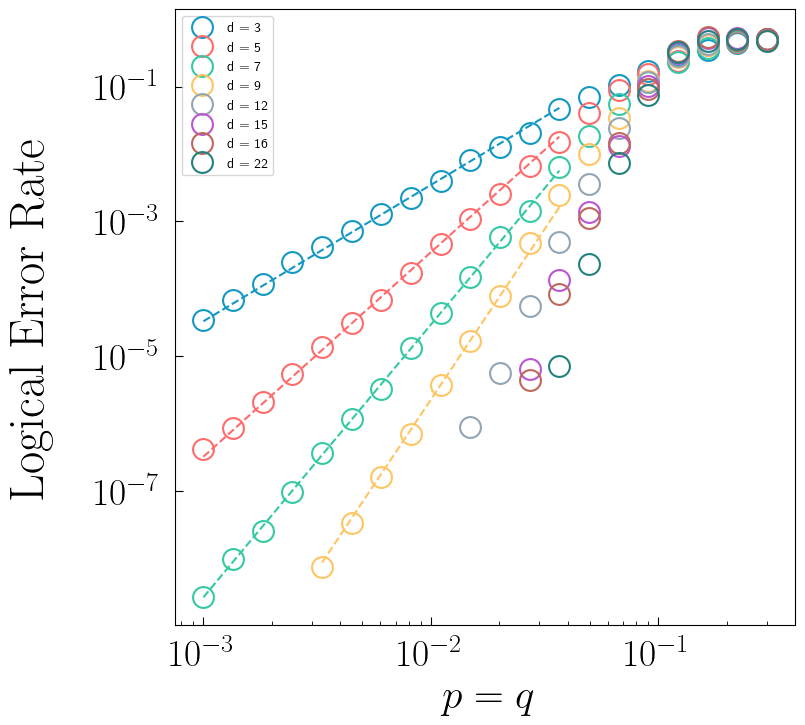

In [4]:
# color map
rgcolor = ['#1398c4', '#ff6b6b', '#34C9A4', '#ffc463', '#92A5B5', '#BA55D3', '#c0675c', '#20817d']

# print text with Latex
plt.rcParams['text.usetex'] = True

# setup figure
fig,ax = plt.subplots()
fig.set_size_inches(8,8)

plt.xscale('log')
plt.yscale('log')

ax.get_xaxis().set_tick_params(which='major', direction='in', labelsize=27, length=6,pad = 10)
ax.get_xaxis().set_tick_params(which='minor', direction='in', labelsize=27, length=3)
ax.get_yaxis().set_tick_params(which='major', direction='in', labelsize=27, length=6,pad = 10)
ax.get_yaxis().set_tick_params(which='minor', direction='in', labelsize=27, length=3)
ax.set_xlabel(r'$p=q$', fontsize=30)
ax.set_ylabel(r'$\textrm{Logical Error Rate}$', fontsize=35,labelpad=30)

# plot logical error rate
d_list = [3,5,7,9,12,15,16,22]
for index,d in enumerate(d_list):
    plt.plot(err_phy,ZLrep[index],'o', label = 'd = '+str(d),fillstyle = 'none',c = rgcolor[index],markersize = 15,markeredgewidth = 1.5)
    
plt.legend()
    
# plot fit
plt.plot(X1, np.exp(log_model(X1, A, pth, d_scaling,3 )), '--',c = rgcolor[0])
plt.plot(X2, np.exp(log_model(X2, A, pth, d_scaling,5 )), '--',c = rgcolor[1])
plt.plot(X3, np.exp(log_model(X3, A, pth, d_scaling,7 )), '--',c = rgcolor[2])
plt.plot(X4, np.exp(log_model(X4, A, pth, d_scaling,9 )), '--',c = rgcolor[3])

# T-shape code

In [5]:
# distances of the T-shape code
d_list = [7,12,15]
# physical error rate
err_phy = np.logspace(-3,np.log10(0.3),20)

# load logical error
ZLTshape = np.load("./T-shape code/Logical error/ZLTshape_pheno.npy")

# number of logical qubit
L = 10

# compute logical error rate per logical qubit
for i in range(len(ZLTshape)):
    ZLTshape[i] = 1 - (1 - ZLTshape[i])**(1/L)

## fit

In [6]:
# bounds in the fit
bound = np.array([[2,14],[7,14],[10,14]])

# physical error
X1 = err_phy[bound[0][0]:bound[0][1]]
X2 = err_phy[bound[1][0]:bound[1][1]]
X3 = err_phy[bound[2][0]:bound[2][1]]

# logical error
Y1 = ZLTshape[0][bound[0][0]:bound[0][1]]
Y2 = ZLTshape[1][bound[1][0]:bound[1][1]]
Y3 = ZLTshape[2][bound[2][0]:bound[2][1]]

# fit function
def log_model(p, A, pth, d_scaling,d):
    return np.log(A*d*(p/pth)**(d_scaling*(d+(d%2))))

# fit curves together
def combined_function(combined_X, A, pth, d_scaling):
    
    # extract each distance physical error 
    # from the concatenated list
    differences = bound[:, 1] - bound[:, 0]
    fit_bound = np.concatenate(([0], np.cumsum(differences)))
    
    X1 = combined_X[fit_bound[0]:fit_bound[1]]
    X2 = combined_X[fit_bound[1]:fit_bound[2]]
    X3 = combined_X[fit_bound[2]:fit_bound[3]]
    
    # concatenate fit function of different distances
    result = np.concatenate((
        log_model(X1, A,pth, d_scaling, 7),
        log_model(X2, A,pth, d_scaling, 12),
        log_model(X3, A,pth, d_scaling, 15),
    ))
    
    return result

# concatenate physical error rate
combined_X = np.concatenate((X1,X2,X3))
# concatenate logical error rate
combined_Y = np.concatenate((Y1,Y2,Y3))

# Fit
params, covariance = curve_fit(combined_function, combined_X, np.log(combined_Y))

# fitted parameters
A, pth,d_scaling = params
print("A = ",A,'pth = ',pth,' d_scaling ',d_scaling)

A =  0.07106848214139799 pth =  0.1204042798308261  d_scaling  0.49566654783355935


C:\Users\druiz\AppData\Local\Temp\ipykernel_20900\3022502555.py:16: RuntimeWarning: invalid value encountered in power
  return np.log(A*d*(p/pth)**(d_scaling*(d+(d%2))))
C:\Users\druiz\AppData\Local\Temp\ipykernel_20900\3022502555.py:16: RuntimeWarning: invalid value encountered in log
  return np.log(A*d*(p/pth)**(d_scaling*(d+(d%2))))


## plot

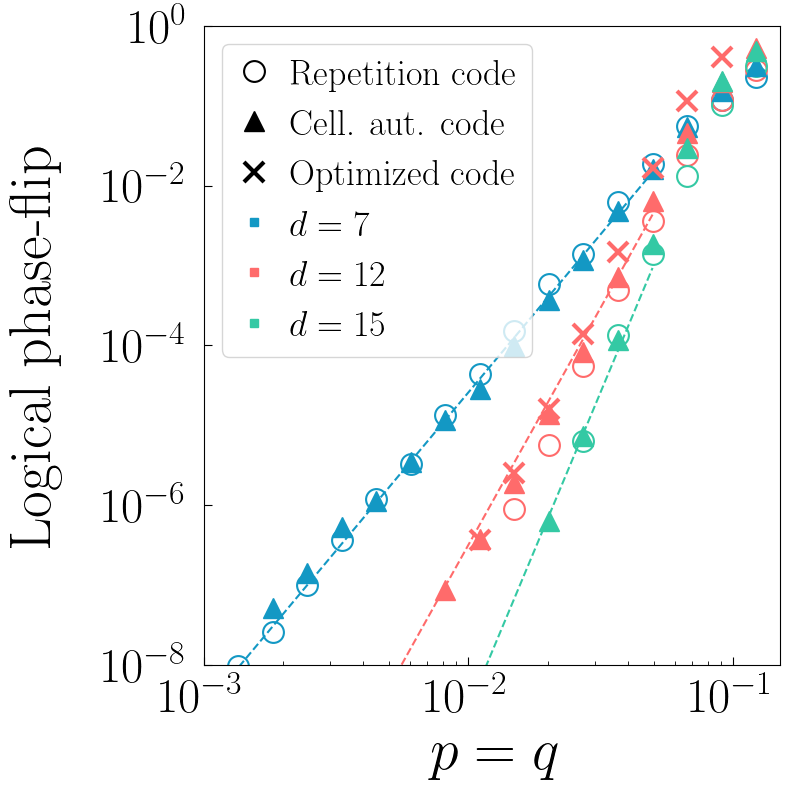

In [7]:
# color map
rgcolor = ['#1398c4', '#ff6b6b', '#34C9A4', '#ffc463', '#92A5B5', '#BA55D3', '#c0675c', '#20817d']

# use latex
plt.rcParams['text.usetex'] = True

# setup figure
fig,ax = plt.subplots()
fig.set_size_inches(8,8)

plt.xscale('log')
plt.yscale('log')

ax.get_xaxis().set_tick_params(which='major', direction='in', labelsize=35, length=6,pad = 10)
ax.get_xaxis().set_tick_params(which='minor', direction='in', labelsize=35, length=3)
ax.get_yaxis().set_tick_params(which='major', direction='in', labelsize=35, length=6,pad = 10)
ax.get_yaxis().set_tick_params(which='minor', direction='in', labelsize=35, length=3)
ax.set_xlabel(r'$p=q$', fontsize=42)
ax.set_ylabel(r'$\textrm{Logical phase-flip}$', fontsize=42,labelpad=30)

######### Plot repetition code #########

# physical error rate
err_phy = np.logspace(-3,np.log10(0.3),20)

# plot logical error rate
d_list = [3,5,7,9,12,15,16,22]
for index,i in enumerate([2,4,5]):
    plt.plot(err_phy,ZLrep[i],'o',fillstyle = 'none',c = rgcolor[index],markersize = 15,markeredgewidth = 1.5)
        
######### Plot T-shape code #########

# plot logical error rate
d_list = [7,12,15]
for i in range(len(d_list)):
    plt.plot(err_phy,ZLTshape[i],'^',c = rgcolor[i],markersize = 15,linewidth = 2.5)
    
# plot fit
plt.plot(err_phy[:bound[0][1]], np.exp(log_model(err_phy[:bound[0][1]], A, pth, d_scaling,7)), '--' ,c = rgcolor[0])
plt.plot(err_phy[:bound[1][1]], np.exp(log_model(err_phy[:bound[1][1]], A, pth, d_scaling,12)), '--',c = rgcolor[1])
plt.plot(err_phy[:bound[2][1]], np.exp(log_model(err_phy[:bound[2][1]], A, pth, d_scaling,15)), '--',c = rgcolor[2])

######### Plot optimized code #########

# load logical error
ZLoptimized = np.load("./optimized code/Logical error/ZLoptimized_pheno.npy")

# compute logical error per logical qubit
L = 17
for i in range(len(ZLoptimized)):
    ZLoptimized[i] = 1 - (1 - ZLoptimized[i])**(1/L)

# plot logical error rate
d_list = [5,9,12,16,22]
plt.plot(err_phy[:16], ZLoptimized[2][:16], 'x', c=rgcolor[1], markersize=15, markeredgewidth=3) # Increase the edge

######### legend #########

plt.plot([],[],'o',fillstyle = 'none',c = 'k',markersize = 15,markeredgewidth = 1.5,label = r'$\textrm{Repetition code}$')
plt.plot([],[],'^',c = 'k',markersize = 15,linewidth = 2.5,label = r'$\textrm{Cell. aut. code}$')
plt.plot([],[],'x',fillstyle = 'none',c = 'k',markersize = 15,markeredgewidth = 3,label = r'$\textrm{Optimized code}$')

d_list = [3,5,7,9,12,15,16,22]
d_list = [7,12,15]
for i in range(len(d_list)):
    plt.plot([],[],'s',label = f'$d = {d_list[i]}$',c = rgcolor[i])
    
plt.legend(loc = 'upper left', prop={'size': 26},handlelength=1, handletextpad=0.5)

######### Layout and save #########

plt.xlim((1e-3,1.5e-1))
plt.ylim((1e-8,1))

plt.tight_layout()
plt.savefig('Figure S2 a.pdf')